In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


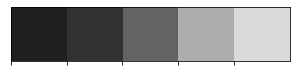

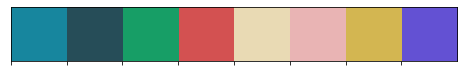

In [4]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']

sns.palplot(colors_dark)
sns.palplot(colors_mix)

In [5]:
d= pd.DataFrame(df['Gender'].value_counts())
fig = px.pie(d,values='Gender',names=['Male','Female'],hole=0.4,opacity=0.7,
            color_discrete_sequence=[colors_mix[7],colors_mix[2]])

fig.add_annotation(text='Gender',
                   x=0.5,y=0.5,showarrow=False,font_size=18,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Gender Ratio',x=0.5,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [6]:
fig = px.histogram(df,x='Age',template='plotly_white',opacity=0.7,nbins=25,
                   color_discrete_sequence=[colors_mix[7]])

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Age',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Age',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [7]:
fig = px.histogram(df,x='Annual Income (k$)',template='plotly_white',opacity=0.7,nbins=20,
                   color_discrete_sequence=[colors_mix[7]])

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Annual Income',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Annual Income (k$)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [8]:
fig = px.histogram(df,x='Spending Score (1-100)',template='plotly_white',opacity=0.7,nbins=20,
                   color_discrete_sequence=[colors_mix[7]])

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Spending Score',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Spending Score',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [9]:
df.drop('CustomerID',axis=1,inplace=True)

In [10]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [11]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Male' else 1)

In [12]:
df['Gender']

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

In [13]:
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [14]:
wcss= []    
ss = []    
for i in range(2,11):
    model = KMeans(n_clusters=i)
    model.fit_transform(X)
    wcss.append(model.inertia_)
    ss.append(silhouette_score(X,labels=model.predict(df)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but KMeans was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but KMeans was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but KMeans was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but KMeans was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but KMeans was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but KMeans was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but KMeans was fitted without feature names

/usr/local/lib/pytho

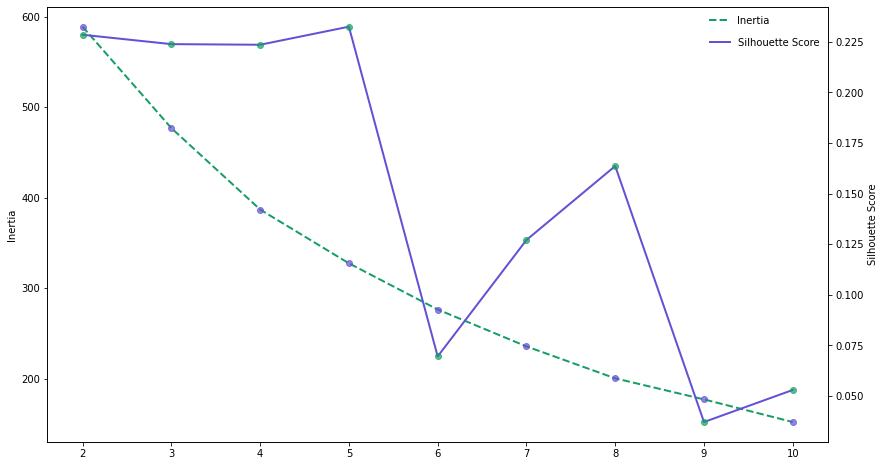

In [15]:
fig,ax1 = plt.subplots(figsize=(14,8))

ax1.plot(range(2, 11), wcss , '--', color=colors_mix[2], linewidth=2)
ax1.legend(['Inertia'],bbox_to_anchor=(0.9365,1),frameon=False)
ax1.plot(range(2, 11), wcss , 'o', color=colors_mix[7],alpha=0.7)
ax1.set_ylabel('Inertia')

ax2 = ax1.twinx()
ax2.plot(range(2, 11), ss, '-', color=colors_mix[7], linewidth=2)
ax2.legend(['Silhouette Score'],bbox_to_anchor=(1,0.95),frameon=False)
ax2.plot(range(2, 11), ss, 'o', color=colors_mix[2], alpha=0.7)
ax2.set_ylabel('Silhouette Score')

plt.xlabel('Number of clusters')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.25181529157884364
For n_clusters = 4 The average silhouette_score is : 0.30123231688013513
For n_clusters = 6 The average silhouette_score is : 0.3199872749106995
For n_clusters = 8 The average silhouette_score is : 0.38738083581583793
For n_clusters = 10 The average silhouette_score is : 0.42011198117622134


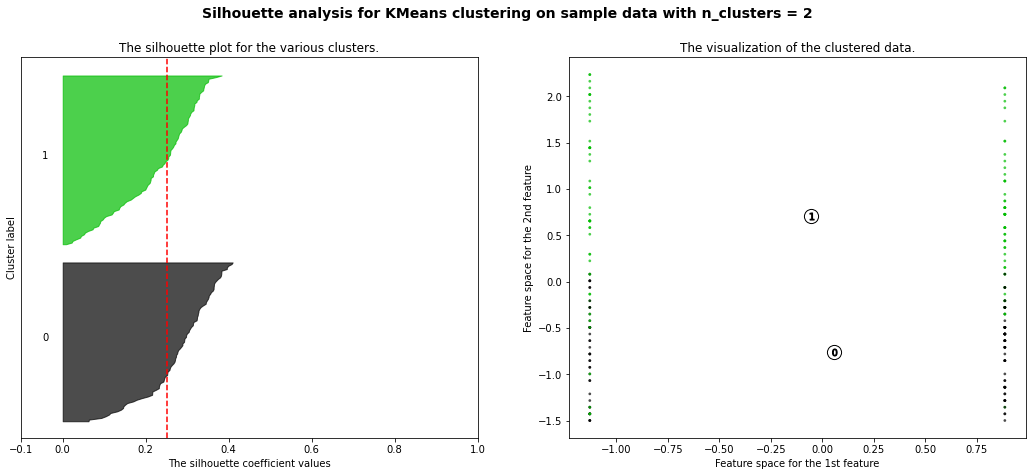

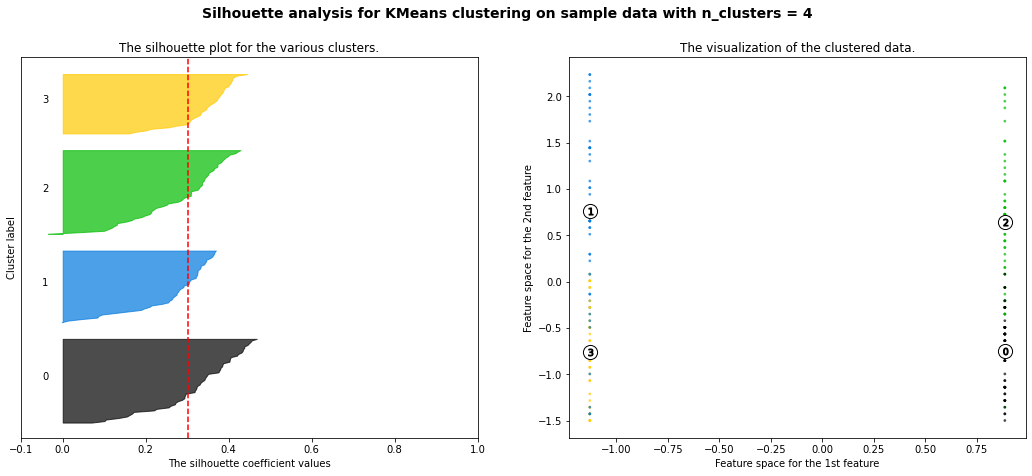

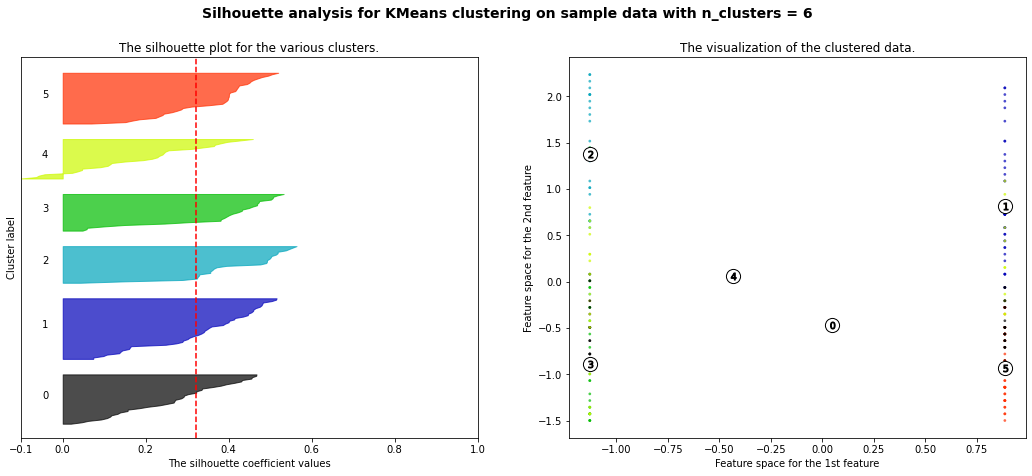

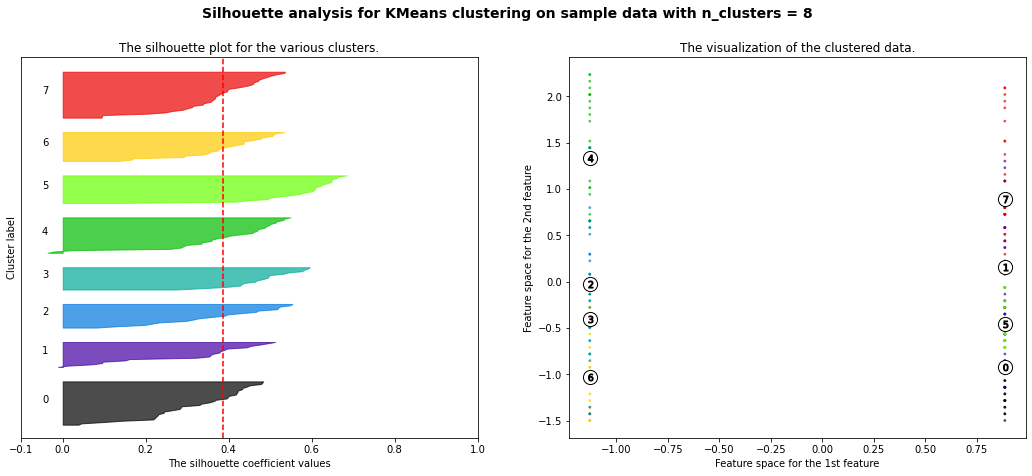

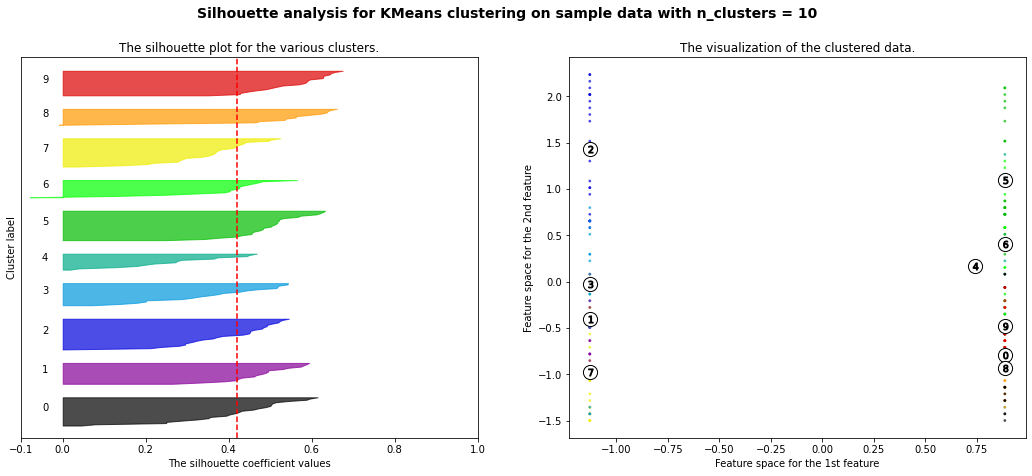

In [16]:
range_n_clusters =[2,4,6,8,10]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [17]:
model = KMeans(n_clusters=2)
predictions = model.fit_predict(X)

In [18]:
new_df = pd.merge(df,pd.Series(predictions,name='Cluster'),on=df.index)
new_df.drop('key_0',axis=1,inplace=True)
new_df.head()

ValueError: ignored

In [19]:
fig = px.histogram(new_df,x='Age',color='Cluster',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=50,color_discrete_sequence=[colors_mix[2],colors_mix[7]],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Age After Clustering',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Age',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

NameError: ignored

In [20]:
fig = px.histogram(new_df,x='Annual Income (k$)',color='Cluster',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=50,color_discrete_sequence=[colors_mix[2],colors_mix[7]],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Annual Income After Clustering',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Annual Income (k$)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

NameError: ignored

In [21]:
fig = px.histogram(new_df,x='Spending Score (1-100)',color='Cluster',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=25,color_discrete_sequence=[colors_mix[2],colors_mix[7]],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Spending Score After Clustering',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Spending Score (1-100)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

NameError: ignored

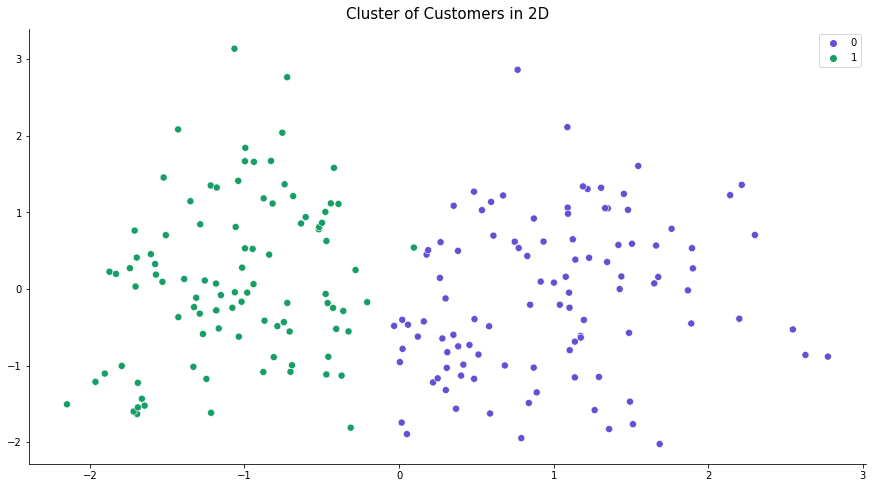

In [22]:
pca = PCA(2)
pca.fit(X)
X_PCA = pca.transform(X)
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=predictions, palette=[colors_mix[7],colors_mix[2]], s=50)
plt.title('Cluster of Customers in 2D', size=15, pad=10)
sns.despine()
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

In [23]:
pca = PCA(3)
pca.fit(X)
X_PCA = pca.transform(X)


fig = px.scatter_3d(x=X_PCA[:,0], y=X_PCA[:,1], z=X_PCA[:,2],
                    color=predictions,opacity=0.8,color_continuous_scale=[colors_mix[2],colors_mix[7]],
                   width=800,height=800)

fig.update_layout(font_family='monospace',
    title=dict(text='Customer Clusters in 3D',x=0.5,y=0.95,
    font=dict(color=colors_dark[2],size=20)),
    coloraxis_showscale=False)
fig.show()

In [24]:
model = AgglomerativeClustering(distance_threshold=0,n_clusters=None)
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [25]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

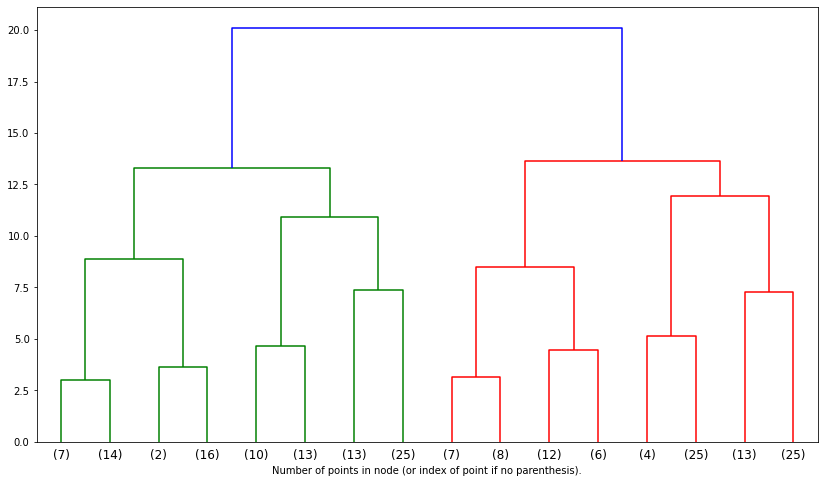

In [26]:
plt.figure(figsize=(14,8))
plot_dendrogram(model,truncate_mode = 'level',p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [27]:
model = DBSCAN(eps=1,min_samples=5)
cluster_labels = model.fit_predict(X)

In [28]:
silhouette_score(X,cluster_labels)

0.2543871824295202

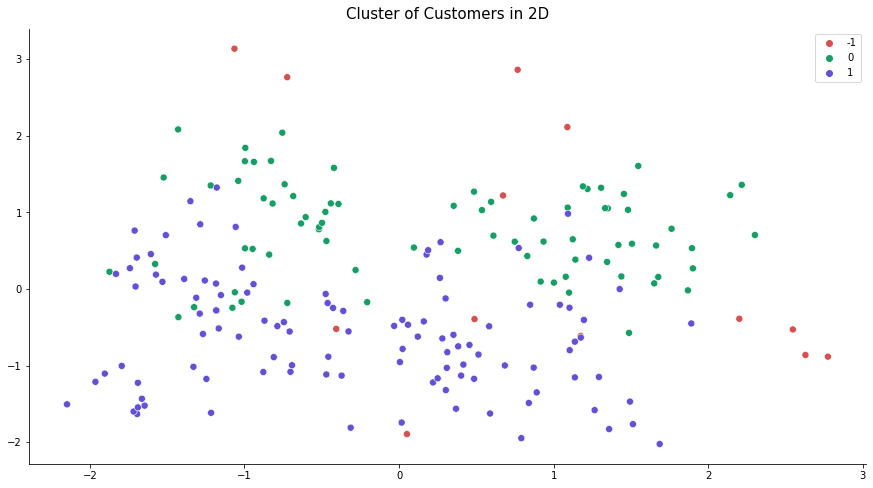

In [29]:
pca = PCA(2)
pca.fit(X)
X_PCA = pca.transform(X)
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=cluster_labels, palette=[colors_mix[3],colors_mix[2],colors_mix[7]], s=50)
plt.title('Cluster of Customers in 2D', size=15, pad=10)
sns.despine()
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

In [30]:
pca = PCA(3)
pca.fit(X)
X_PCA = pca.transform(X)


fig = px.scatter_3d(x=X_PCA[:,0], y=X_PCA[:,1], z=X_PCA[:,2],
                    color=cluster_labels,opacity=0.8,
                    color_continuous_scale=[colors_mix[3],colors_mix[7],colors_mix[2]],
                    width=800,height=800)

fig.update_layout(font_family='monospace',
    title=dict(text='Customer Clusters in 3D',x=0.5,y=0.95,
    font=dict(color=colors_dark[2],size=20)),
    coloraxis_showscale=False)
fig.show()